# The Sparks Foundation
## Prediction using Supervised ML

## Objective

Predict a student's percentage score depending on the number of study hours by using a simple linear regression model.

<h4 align="center"><span style='font-family:arial'>by Iman Ngwepe-Ntshibida</h4>

In [1]:
# libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# import the model
from sklearn.linear_model import LinearRegression
# split into train and test
from sklearn.model_selection import train_test_split
# evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Preparation

In [2]:
# reading the csv file into a dataframe
scores = pd.read_csv('student_scores.csv')
print('size of the DataFrame: ', scores.shape)
scores.head()

size of the DataFrame:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


> Cleaning and Wrangling

- missing values

In [3]:
scores.isna().sum()/len(scores)

Hours     0.0
Scores    0.0
dtype: float64

- duplicates

In [4]:
scores.duplicated().sum()

0

- information

In [5]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


    The dataset is clean, it has no missing and duplicate values. All the datatypes are in order.

# Exploration

- correlation

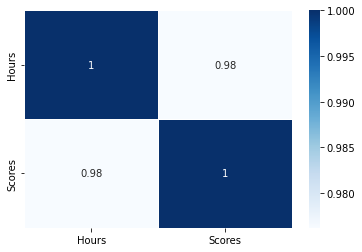

In [6]:
# correlation
sns.heatmap(scores.corr(), annot =True, cmap='Blues', linewidth=1.0);

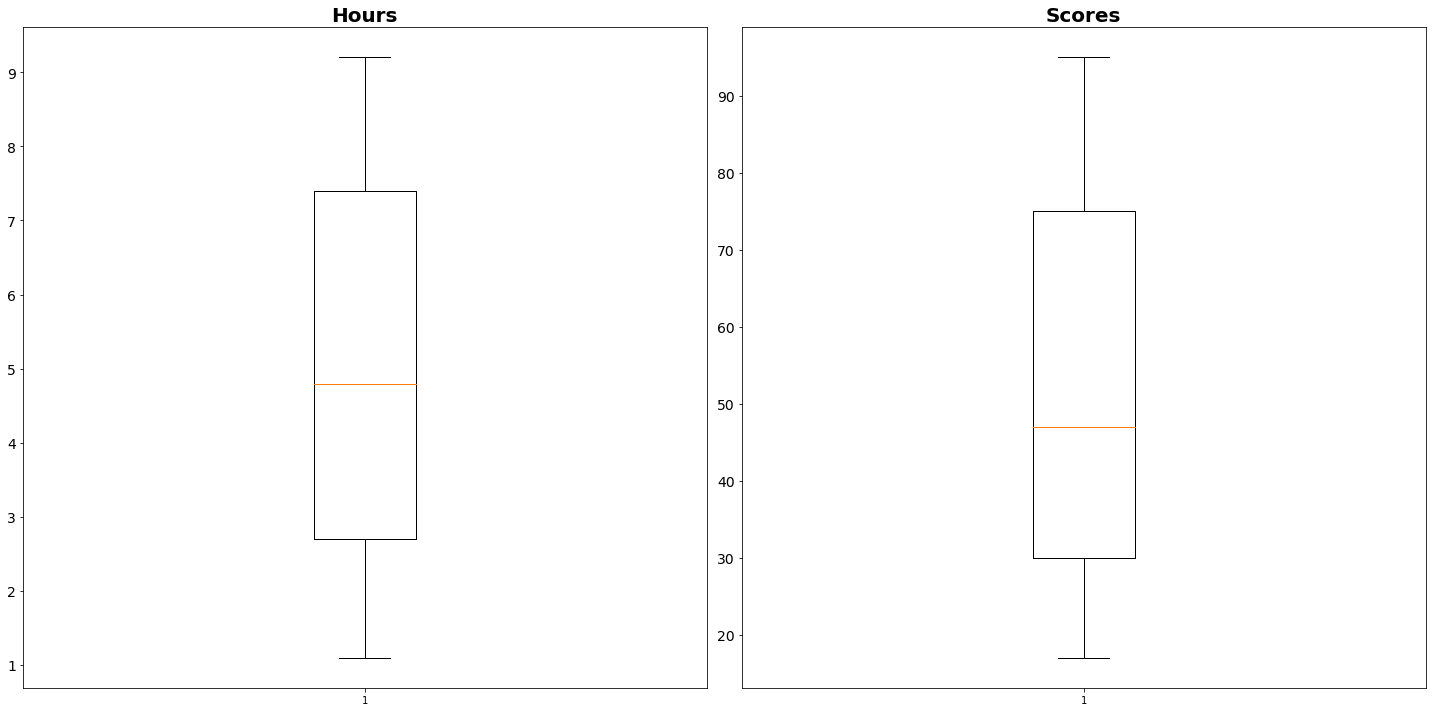

In [7]:
# box plot to check if data is skewed, understand the measure of spread 
# and identify possible outliers

# create subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

# make subplots
fig, axs = plt.subplots(1,len(scores.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(scores.iloc[:,i],
              flierprops=red_circle)
    scores.iloc[:,i]
    
    ax.set_title(scores.columns[i],
            fontsize=20,
            fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout();

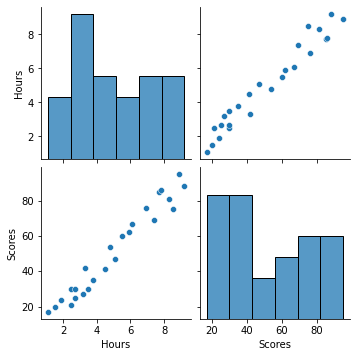

In [8]:
# pairplot
sns.pairplot(data=scores);

     The features have a high positive correlation of 0.98. There are 
     no outliers.

- statistical summary

In [9]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


 The data distribution for both fearures is slightly right skewed. 

# Model Building

In [10]:
# Split data into 'X' and 'y'
X = scores.drop('Scores', axis=1)
y = scores['Scores']

> Baseline Model

In [11]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2, random_state=42)

In [12]:
y_mean = y_train.mean()

In [13]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[50.85, 50.85, 50.85, 50.85, 50.85]

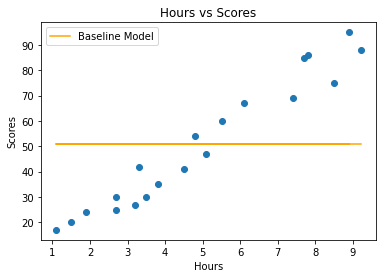

In [14]:
plt.plot(X_train['Hours'], y_pred_baseline, color='orange', label='Baseline Model')
plt.scatter(X_train, y_train)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.legend();

In [15]:
# Evaluate
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
mse_baseline = mean_squared_error(y_train, y_pred_baseline)

print('Mean student score', round(y_mean, 2))
print('Baseline MAE:', round(mae_baseline, 2))
print('Baseline MSE:', round(mse_baseline, 2))

Mean student score 50.85
Baseline MAE: 22.14
Baseline MSE: 618.23


> Linear Regression Model

In [16]:
# instance of Linear Regression
lr = LinearRegression()

In [17]:
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_preds = lr.predict(X_train)
#y_preds[:5]

In [19]:
y_preds = lr.predict(X_test)
y_preds[:5]

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

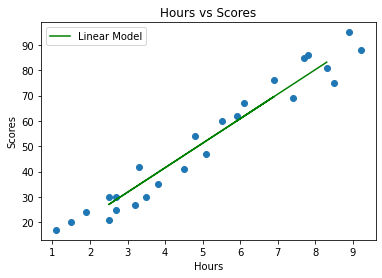

In [20]:
plt.plot(X_test['Hours'], y_preds, color='green', label='Linear Model')
plt.scatter(X, y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.legend();

In [21]:
# evaluate predictions
mse_test = mean_squared_error(y_test, y_preds)
print('The test MSE is:', round(mse_test, 2))
mae_test = mean_absolute_error(y_test, y_preds)
print('The test MAE is:', round(mae_test, 2))

The test MSE is: 18.94
The test MAE is: 3.92


     The squared difference between the actual and predicted scores is 18.03 points. 
     The predictions are about 3.92 score points off.

In [22]:
# compare actual and predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})
df.head()

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [23]:
# linear equation
intercept = round(lr.intercept_)
coefficient = round(lr.coef_[0], 2)
print(f'Score = {intercept} + {coefficient} * Hours')

Score = 3 + 9.68 * Hours


> Optimization Using Gradient Descent

In [24]:
# building model
X = scores['Hours']
Y = scores['Scores']

m = 0 
c = 0 

L = 0.0001  # learning rate
epochs = 1000  # number of iterations

n = float(len(X)) # number of elements in X

for i in range(epochs):
    Y_pred = m*X + c  # current predicted value of y
    D_m = (-2/n) * sum(X * (Y - Y_pred)) # derivative of wrt m
    D_c = (-2/n) * sum(Y - Y_pred) # derivative of wrt c
    m = round((m - L * D_m), 2)  # updated m
    c = round((c - L * D_c), 2)  # updated c

print(f'The slope is {m} and the intercept is {c}')

The slope is 9.2 and the intercept is 1.13


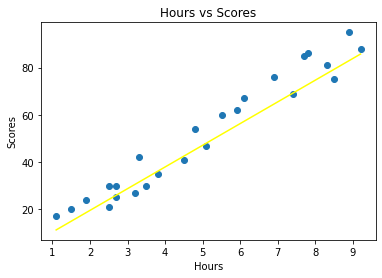

In [25]:
y_pred = m*X + c

plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color= 'yellow')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores');

In [26]:
# compare actual scores and predicted scores
gradient = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
gradient.head()

,Actual,Predicted
0,21,24.13
1,47,48.05
2,27,30.57
3,75,79.33
4,30,33.33


In [27]:
# The loss function
mse_gradient = mean_squared_error(y, y_pred)
print('The gradient descent MSE is:', round(mse_gradient, 2))

The gradient descent MSE is: 48.89


    The squared difference between the actual and predicted scores is 29.03 points, which is much higher than the linear regression model. 
    We will therefore use the simple linear regression model to answer
    our question.

> Answering the question.

**Question:** What will be predicted score if a student studies for 9.25 hrs/day?

In [29]:
lr.predict([[9.25]])

array([92.38611528])

**Answer:** The predicted score will be 92 %.